In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Spotify API istemci kimliği ve gizli anahtarını girin
client_id = 'your client id'
client_secret = 'your client secret'

# Çalma listesi URI'sini girin
playlist_uri = 'your playlist uri'


In [3]:
# Spotify API'ye yetkilendirme sağlayın
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
# Çalma listesindeki tüm şarkıları almak için bir döngü kullanın
playlist_features = []
offset = 0
limit = 100

while True:
    # Çalma listesindeki şarkıları alın
    results = sp.playlist_tracks(playlist_uri, offset=offset, limit=limit)
    tracks = results['items']

    if not tracks:
        break

    # Her şarkı için özellikleri alın
    for track in tracks:
        track_info = {}
        # Şarkının ID'sini alın
        track_info['ID'] = track['track']['id']
        # Şarkının adı ve sanatçılarını alın
        track_info['Name'] = track['track']['name']
        track_info['Artists'] = ', '.join([artist['name'] for artist in track['track']['artists']])

        # Şarkının özelliklerini alın
        audio_features = sp.audio_features(track['track']['uri'])
        if audio_features:
            audio_features = audio_features[0]
            for feature in ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                            'instrumentalness', 'liveness', 'valence', 'tempo']:
                track_info[feature] = audio_features.get(feature)
        playlist_features.append(track_info)

    offset += limit


In [5]:
# Özellikleri içeren bir DataFrame oluşturun
df = pd.DataFrame(playlist_features)
df

,ID,Name,Artists,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4sLozZ8Weo81XhRrwqbqnJ,On The Run,Naz Tokio,0.627,0.482,-13.403,1,0.0374,0.000601,0.000948,0.0703,0.157,125.027
1,4pt5fDVTg5GhEvEtlz9dKk,I WANNA BE YOUR SLAVE,Måneskin,0.750,0.608,-4.008,1,0.0387,0.001650,0.000000,0.1780,0.958,132.507
2,6BDoYKMD9I4qJgXHtlY4ms,Moshi Moshi,"Yung Rare, Pyrxciter, Young zetton",0.362,0.977,-1.340,1,0.3400,0.001300,0.000000,0.9470,0.457,111.909
3,1i1fxkWeaMmKEB4T7zqbzK,Don't Let Me Down,"The Chainsmokers, Daya",0.532,0.869,-5.094,1,0.1720,0.157000,0.005080,0.1360,0.422,159.803
4,6zDs6zI94L761vd0cVScTT,I'm Born To Run,American Authors,0.620,0.930,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.675,126.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,01GzR8CaxfoPzAWYhvH8Nn,The Path of Silence,"Anne Sophie Versnaeyen, Gabriel Saban, Philipp...",0.213,0.412,-12.324,0,0.0449,0.740000,0.860000,0.1110,0.160,92.167
705,6enLk2V2s0M6D6PGLjHxYv,Assassin's Creed IV Black Flag Main Theme,"Brian Tyler, Assassin's Creed",0.320,0.621,-12.207,1,0.0563,0.042900,0.896000,0.0802,0.319,128.025
706,7kUljt0NM5sISL3OGNVxYd,Royalty,"Egzod, Maestro Chives, Neoni",0.388,0.855,-4.229,0,0.0644,0.018100,0.000081,0.1370,0.320,80.121
707,1OuCn2F9BmyTAdM0Jylo9X,Paint It Black,Wednesday Addams,0.612,0.319,-10.132,0,0.0312,0.892000,0.930000,0.1030,0.727,129.878


In [6]:
#id'leri ayırın ve gereksiz sütunları kaldırın
df_id=df[['ID']]
veri=df.drop(['ID','Name','Artists'],axis=1)

In [7]:
#Standart Scaler ile veriyi scalerize edin
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
veri=sc.fit_transform(veri)

In [8]:
#Dataframe oluşturun
veri=pd.DataFrame(veri)
veri.columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [ ]:
#dendogram yardımıyla kaç küme isteğimize(k) karar verebiliriz.
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(veri,method='ward'))
plt.show()

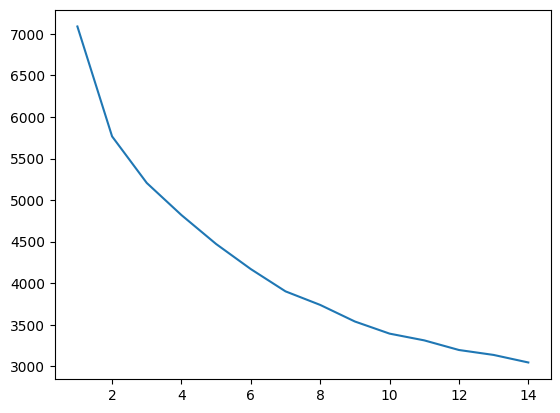

In [20]:
#WCSS değerlerine bakalım
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i, n_init=10, random_state=18)
    km.fit(veri)
    wcss.append(km.inertia_)#bu da wcss değerlerini ölçen fonksiyon
    
#artık elimizde wcss değerleri var ve biz uygun k sayısını bulabiliriz
plt.plot(range(1,15),wcss)
plt.show()
#kmeans ile wcss değerlerine baktık dendogram yarımıyla k değerini 12 olarak karar verdim.Çok fazla veri olduğu için 12 gibi büyük bir değer ile karşılaştım.
#k değerine karar verirken wcss tablosundaki dirsek noktası veya dendogramdaki kümeler arası en fazla mesafe olan kısmı k değeri olarak alabiliriz

In [28]:
from sklearn.cluster import AgglomerativeClustering

k=12

# id sütununu saklamak için bir liste oluşturun
id_listesi = df_id.values.tolist()



# Kümeleme
ac = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
pred = ac.fit_predict(veri)

# Sadece id'leri içeren bir liste oluşturun
tahmin_id_listesi = [id_listesi[i] for i in range(len(id_listesi))]

# Tahminleri alın ve id'leri ekleyin
tahminler = [(tahmin_id_listesi[i], pred[i]) for i in range(len(pred))]

# Küme etiketlerine göre verileri gruplara ayırın
kumeler = {}
for id, etiket in tahminler:
    if etiket in kumeler:
        kumeler[etiket].append(id)
    else:
        kumeler[etiket] = [id]

# Her bir küme için ekrana yazdırma
for etiket, id_listesi in kumeler.items():
    print(f"Küme {etiket}:")
    for id in id_listesi:
        print(id)
    print()


Küme 4:
['4sLozZ8Weo81XhRrwqbqnJ']
['5FVd6KXrgO9B3JPmC8OPst']
['5zsHmE2gO3RefVsPyw2e3T']
['4pbJqGIASGPr0ZpGpnWkDn']
['3xgK660fsZH7ZDcOMfIdfB']
['5nekfiTN45vlxG0eNJQQye']
['1DIXPcTDzTj8ZMHt3PDt8p']
['2ElbLGcKawSsNhkzdxhnly']
['7KA4W4McWYRpgf0fWsJZWB']
['0xaFw2zDYf1rIJWl2dXiSF']
['5QvBXUm5MglLJ3iBfTX2Wo']
['61eJ7HqXGyHfmHIqJApX7v']
['70LcF31zb1H0PyJoS1Sx1r']
['2kaH2Z8ezDUKf6fNw250rZ']
['44CZRkOxv7UItaAUmh8PgN']
['3d1uVR0tV2z4QxKH3gcxrK']
['10hMM5nsZQf66ldBlgWBfG']
['1RaF9xwakfao1RRknWyYB5']
['2XMAWynSTIst5KmLSv0Npf']
['2NbsBSshscKIPRG3kwBbfo']
['0NTMtAO2BV4tnGvw9EgBVq']
['37F0uwRSrdzkBiuj0D5UHI']
['3JEJwjqLkg2Jbau5922CAb']
['4gT3mNJA8lnlkYFqGZ8IA2']
['5odlY52u43F5BjByhxg7wg']
['4F7A0DXBrmUAkp32uenhZt']
['1Y3LN4zO1Edc2EluIoSPJN']
['4P7VFiaZb3xrXoqGwZXC3J']
['10nyNJ6zNy2YVYLrcwLccB']
['2cSdAkzAf2T4j4aLvx4LLz']
['1A3tuE6ti9qoZDwB3LB0t2']
['4E4DQVf8GNBvvOaLfvIcvZ']
['3vQmUT2V4WJ7Irk9VjxOsN']
['5lEx9Oo3tMyP85ppH43Uar']
['6gHMPnovJioJRT5tvBAj5w']
['4iQzqoAi1ETVOatMaHGptG']
['7laCR0yqvvRllmY0rA

In [ ]:
#Eğer spotify uygulamanız var ise aşağıdaki kodu kullanarak idleri şarkı olarak playlistlere ekleyebilirsiniz

"""import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Kimlik doğrulama bilgilerini ayarlayın
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='YOUR_CLIENT_ID',
                                               client_secret='YOUR_CLIENT_SECRET',
                                               redirect_uri='YOUR_REDIRECT_URI',
                                               scope='playlist-modify-private',
                                               username='YOUR_USERNAME'))

# Şimdi, her bir küme için bir çalma listesi oluşturabilir ve bu çalma listesine şarkıları ekleyebilirsiniz.
for etiket, sarki_id_listesi in kumeler.items():
    # Çalma listesi oluştur
    playlist = sp.user_playlist_create(user='YOUR_USERNAME', name=f'Cluster {etiket} Playlist', public=False)
    playlist_id = playlist['id']

    # Şarkıları çalma listesine ekle
    sp.user_playlist_add_tracks(user='YOUR_USERNAME', playlist_id=playlist_id, tracks=sarki_id_listesi)
"""